In [1]:
from  preProcessing import preProcessing
from  normalize import normalize
from  decomposition import decomposition
from  vizualisation import vizualisation
from  splitData import splitData
from  crossValid import crossValid
from  grichSearch import grichSearch
from  Models import Models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pr = preProcessing()
n = normalize()
d = decomposition()
v = vizualisation()
sp = splitData()

In [3]:
pr.load()

In [4]:
pr.shapeDF()

(768, 9)

In [5]:
X_train,X_test,y_train,y_test = sp.dataSplit(pr.getDataWithoutLabels(), pr.getLabels())

In [6]:
pr.headDF()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
pr.infoDF()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
pr.describeDF()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

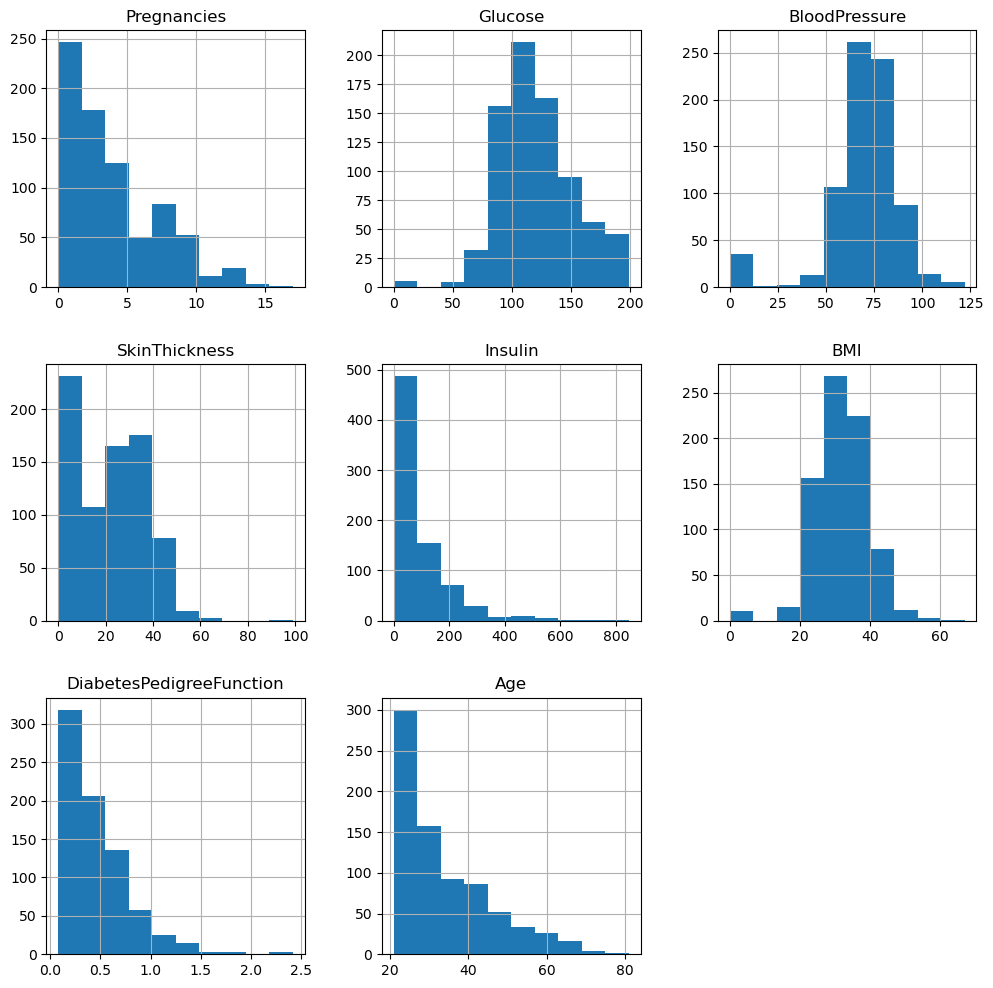

In [9]:
v.histData(pr.df)

<AxesSubplot:xlabel='Outcome'>

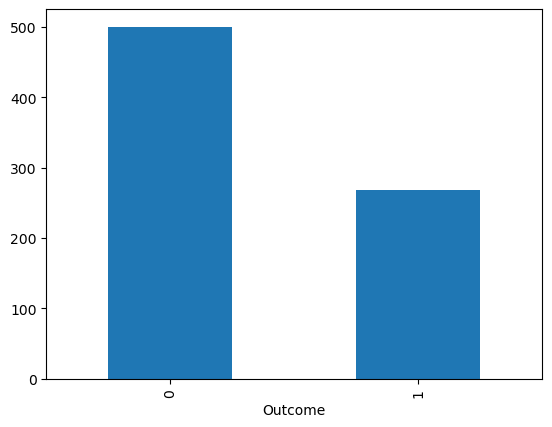

In [10]:
v.barDF(pr.getLabelSeries(),'index','values')

In [11]:
pr.corrDF()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

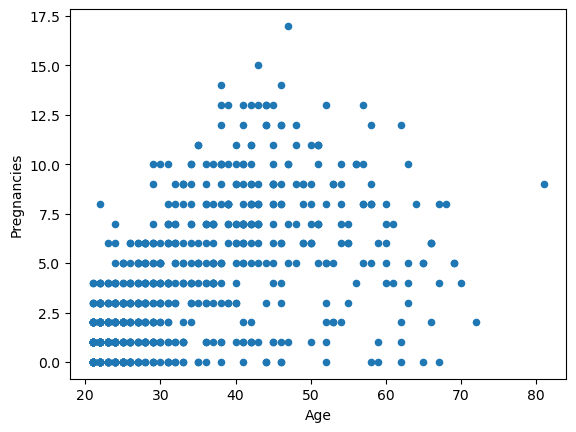

In [12]:
v.scatterDF(pr.df, "Age","Pregnancies")

<AxesSubplot:xlabel='x', ylabel='y'>

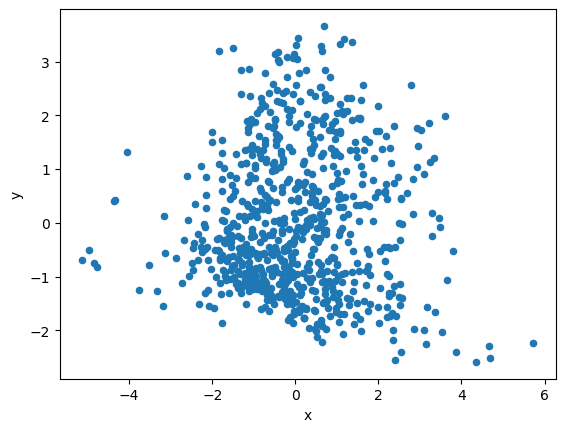

In [13]:
v.visualizeData(d.Pca(n.StandSc(pr.getDataWithoutLabels())))

In [14]:
X_train = n.StandSc(X_train)
X_test = n.StandSc(X_test)

In [15]:
type(X_train)

numpy.ndarray

In [16]:
cvalid = crossValid(X_train,y_train)

In [17]:
M = Models()

In [18]:
cvalid.validModel(M.getModels())

In [19]:
cvalid.resultValidModel()

In [20]:
cvalid.data_rr

,model,accuracy,roc_auc,f1,precision,recall
0,SVM,0.781833,0.835399,0.651568,0.740919,0.593790
1,DecisionTreeClassifier,0.762259,0.838547,0.635965,0.699240,0.587318
2,KNeighborsClassifier,0.729568,0.773116,0.605593,0.636083,0.539491
3,RandomForestClassifier,0.716637,0.683108,0.587098,0.579217,0.546686
4,MLPClassifier,0.760673,0.819406,0.639086,0.655450,0.611740
5,LinearDiscriminantAnalysis,0.773698,0.842822,0.607244,0.705994,0.566061
6,GaussianNB,0.768902,0.831534,0.637578,0.729606,0.604002
7,LogisticRegression,0.783401,0.844122,0.618365,0.747190,0.603168


In [21]:
gr = grichSearch()

In [22]:
gr.gridsearch(cvalid.data_rr,X_train,y_train.values, M.getModels())

In [23]:
gr.accuracyScoreModel(X_test,y_test.values)

0.7207792207792207

In [24]:
gr.model_final

LogisticRegression()

In [25]:
roc_auc = 0.80